In [80]:
import numpy as np
import matplotlib.pyplot as plt
from functools import cached_property

In [81]:
class Map:
    def __init__(self, traces: list[tuple[int,int]], source: tuple[int,int],padding=(2,2), dfloor = None) -> None:

        self._padding = padding
        self._traces = traces
        self._source = source
        self._dfloor = dfloor
        self._sand = 0

        self._map = np.zeros(self.size,dtype=int)
        self._draw_traces()
        self._draw_source()
        
    def _draw_source(self):
        self._map[self._normalized_source[::-1]] = 5
    
    def _draw_traces(self):
        for trace in self._normalized_traces:
            for i in range(len(trace)-1):
                try:
                    xrange = sorted((trace[i][0],trace[i+1][0]))
                    yrange = sorted((trace[i][1],trace[i+1][1]))
                    xrange[-1] += 1
                    yrange[-1] += 1
                    self._map[range(*yrange),range(*xrange)] = 10
                except IndexError as e:
                    print(trace,i)
                    print(xrange)
                    print(yrange)
                    raise(e)
                
    def _normalize_vertex(self,vertex):
        return tuple([x-y for x,y in zip(vertex,self.boundaries[0])])        
            
    @cached_property
    def _normalized_source(self):
        return self._normalize_vertex(self._source)

    @cached_property
    def _normalized_traces(self):
        return [[self._normalize_vertex(t) for t in trace ]for trace in self._traces]

    @cached_property
    def _coords(self):
        return [coord for coords in self._traces for coord in coords] + [(self._source)]

    @cached_property
    def boundaries(self) -> list[int,int,int,int]:
        return [
            (min([c[0] for c in self._coords])-self._padding[0],min([c[1] for c in self._coords])-self._padding[1]),
            (max([c[0] for c in self._coords])+self._padding[0],max([c[1] for c in self._coords])+self._padding[1])
        ]
    @cached_property
    def size(self):
        return tuple([y - x + 1 for x,y in zip(self.boundaries[0],self.boundaries[1])])[::-1]

    def drop(self,origin):

        los = self._map[(origin[1]+1):,origin[0]] != 0
            
        if not any(los):
            if self._dfloor:
                return (origin[0],self.size[0]-self._padding[1] + self._dfloor -2 )
            else:
                return (origin[0],np.inf)
            
        dest = (origin[0],np.argmax(los)+origin[1])
        
        
        left_down = (dest[0]-1,dest[1]+1)
        right_down = (dest[0]+1,dest[1]+1)

        if dest == self._normalized_source and self._map[left_down[::-1]] != 0 and self._map[right_down[::-1]] != 0:
            return self._normalized_source
            
        if self._map[left_down[::-1]] == 0:
            return self.drop(left_down)
        elif self._map[right_down[::-1]] == 0:
            return self.drop(right_down)
        else:
            return dest

    def fill(self):
        self._sand = 0
        j = 10
        while True:
            dest = self.drop(self._normalized_source)
            
            if np.inf in dest:
                break

            if dest == self._normalized_source:
                self._sand += 1
                break 

            self._map[dest[::-1]] = 5
            self._sand += 1
            if self._sand % j == 0:
                j *= 10
                print(f"{self._sand} units of sand have poored into the save so far")           

        print(f"it took: {self._sand} units of sand to fill the cave")           

    def __repr__(self) -> str:
        # return np.array2string(self._map)
        plt.imshow(a._map, interpolation=None, cmap='binary')
        plt.axis('off')
        return ''

    def __str__(self) -> str:
        plt.imshow(a._map, interpolation=None, cmap='binary')
        plt.axis('off')
        plt.show(block=False)
        return ''

In [86]:
with open('./assets/input_day_14.txt','r') as file:
    input = list(map(lambda line: [tuple([int(y) for y in x.split(',')]) for  x in line.split(' -> ')],file.read().splitlines()))

    a = Map(input,(500,0),padding=(2,2))
    b = Map(input,(500,0),padding=(175,10),dfloor=2)
    

10 units of sand have poored into the save so far
100 units of sand have poored into the save so far
it took: 665 units of sand to fill the cave


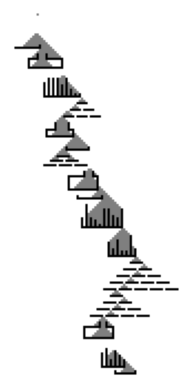

In [87]:
a.fill()
print(a)

10 units of sand have poored into the save so far
100 units of sand have poored into the save so far
1000 units of sand have poored into the save so far
10000 units of sand have poored into the save so far
it took: 25434 units of sand to fill the cave


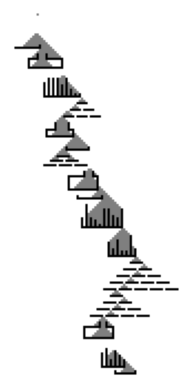

In [88]:
b.fill()
print(b)